### Import packages

In [1]:
#Calculations
import math
import numpy as np

#Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colors, cm, ticker
from mpl_toolkits.axes_grid.inset_locator import inset_axes
    
#Other
from single_file_simulation_tools import *
from waiting_time_tools import *
from entropy_tools      import *

/tmp/ipykernel_12645/2268983749.py:9: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  from mpl_toolkits.axes_grid.inset_locator import inset_axes


### Set Latex plot font

In [2]:
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family']      = 'STIXGeneral'
mpl.rcParams["mathtext.fontset"] = "cm"
mpl.rcParams.update({'errorbar.capsize': 4})
mpl.rcParams['axes.linewidth'] = 2

### Set constants for single-file system with uniform bias

In [3]:
Nsteps = 2*10**8       #Number of discrete steps
Nsites = 5             #Number of sites
Nvacancies = 1         #Number of vacancies
Nmilestones = 3        #Number of milestones
pbias = 0.5            #Jump probabilities
scenario = 0           #0: uniform bias, 1: tagged particle bias, 2: bath particle bias
waiting_time = False   #Waiting time on the microscopic level 
                       #i.e. do we only track changes in the particle positions, 
                       #or also the waiting in equal microscopic states?

### Run single-file system with uniform bias

In [4]:
%%time
full_traj, lump_traj, mil_traj = single_file(Nsteps,Nsites,Nvacancies,Nmilestones,pbias,scenario,waiting_time)

CPU times: user 32.3 s, sys: 577 ms, total: 32.9 s
Wall time: 32.7 s


### Determine backward milestoned trajectory (to show kinetic hysteresis)

In [5]:
#Backward trajectory
mil_traj_back = backward_milestoned_trajectory(Nsteps,Nsites,Nmilestones,lump_traj)

### Determine halfway cut trajectory (to remove kinetic hysteresis, not in the manuscript)

In [ ]:
#Backward trajectory
halfway_cut_traj = half_way_cut_mil(mil_traj, mil_traj_back)

### Plot trajectories

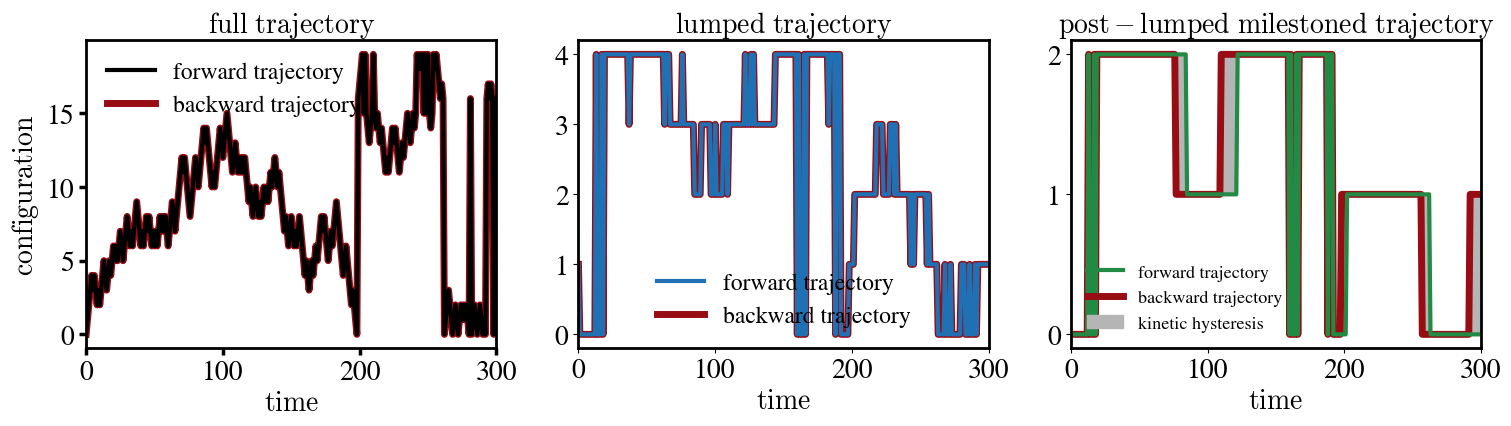

In [7]:
#Figure settings
fig, ax = plt.subplots(1,3, figsize = (18,4))
ax.ravel()

#Set step limit
step_lim = 300

#Plot forward trajectories
ax[0].plot(full_traj[0:step_lim], linewidth = 3, label = r'forward trajectory', color = 'black');
ax[1].plot(lump_traj[0:step_lim], linewidth = 3, label = r'forward trajectory', color = cm.Blues(0.75));
ax[2].plot(mil_traj[0:step_lim], linewidth = 3,  label = r'forward trajectory',  color = cm.Greens(0.75));

#Plot backward trajectories
ax[0].plot(full_traj[0:step_lim],     label = r'backward trajectory', linewidth = 5, color = cm.Reds(0.9), zorder = -1);
ax[1].plot(lump_traj[0:step_lim],     label = r'backward trajectory', linewidth = 5, color = cm.Reds(0.9), zorder = -1);
ax[2].plot(mil_traj_back[0:step_lim], label = r'backward trajectory', linewidth = 5, color = cm.Reds(0.9),         zorder = -1);
#ax[2].plot(halfway_cut_traj[0:step_lim], label = r'midway cut', linewidth = 3, linestyle = '--', color = 'Black',         zorder = -1);

#Explicitly highlight the kinetic hysteresis
ax[2].fill_between(np.arange(0, step_lim, 1), mil_traj[0:step_lim], mil_traj_back[0:step_lim], color = cm.Greys(0.4), zorder = -2, label = r'kinetic hysteresis')

#Set labels
ax[0].set_xlabel(r'${\rm time}$', size = 20);
ax[1].set_xlabel(r'${\rm time}$', size = 20);
ax[2].set_xlabel(r'${\rm time}$', size = 20);
ax[0].set_ylabel(r'$\rm configuration$', size = 20);

#Set axis limits
ax[0].set_xlim([0,step_lim]);
ax[1].set_xlim([0,step_lim]);
ax[2].set_xlim([0,step_lim]);

#Set axis ticks
ax[2].set_yticks([0,1,2],['0','1','2'])

#Set tick sizes
ax[0].tick_params('both', length=5, width=2.5, which='major');
ax[0].xaxis.set_tick_params(labelsize=20), ax[0].yaxis.set_tick_params(labelsize=20);
ax[1].xaxis.set_tick_params(labelsize=20), ax[1].yaxis.set_tick_params(labelsize=20);
ax[2].xaxis.set_tick_params(labelsize=20), ax[2].yaxis.set_tick_params(labelsize=20);

#Add titles
ax[0].set_title(r'$\rm full \ trajectory$',                     fontsize = 20);
ax[1].set_title(r'$\rm lumped \ trajectory$',                   fontsize = 20);
ax[2].set_title(r'$\rm post-lumped \ milestoned \ trajectory$', fontsize = 20);

#Plot legend
ax[0].legend(frameon = False, fontsize = 17);
ax[1].legend(frameon = False, fontsize = 17);
ax[2].legend(loc = 'best', frameon = False, fontsize = 13);

#Save figure
#plt.savefig('./Plots/single_file_kinetic_hysteresis.pdf', bbox_inches = 'tight', dpi = 100)

### Plot waiting-time distributions for milestoned trajectory (this only works when Nmilestones = 3)

In [8]:
#Collect waiting-time statistics for each of the three milestones
psi0min, psi0plus, psi1plus, psi1min, psi2min, psi2plus = waiting_time_module(mil_traj)

#Analaytical waiting-time distributions
k_arr = np.arange(1,400,1) 
psi0plusplusana, psi0minminana, psi0minplusana,  psi0plusminana, psi1plusplusana, psi1minminana, psi1minplusana,  psi1plusminana, psi2plusplusana, psi2minminana, psi2minplusana,  psi2plusminana = analytical_waiting_times(Nsites,Nmilestones,pbias,k_arr)

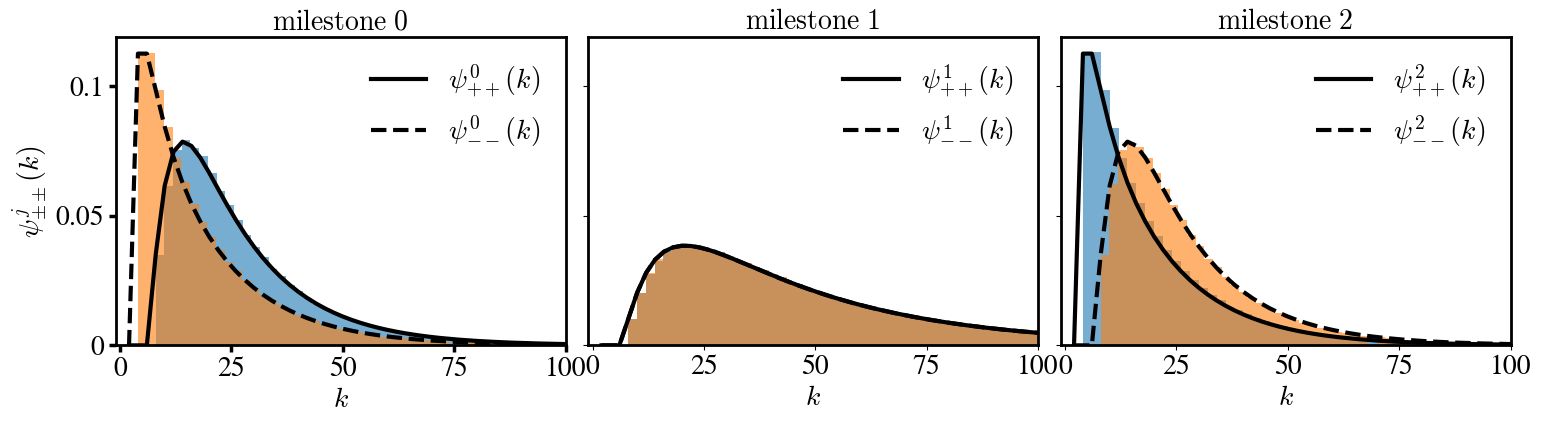

In [24]:
#Figure settings
fig, ax = plt.subplots(1,3, figsize = (18,4), sharey = True)
ax.ravel()

#Compute histograms
counts1, bins1 = np.histogram(psi0min,  bins = 110)
counts2, bins2 = np.histogram(psi0plus, bins = 115)
counts3, bins3 = np.histogram(psi1min,  bins = 210)
counts4, bins4 = np.histogram(psi1plus, bins = 225)
counts5, bins5 = np.histogram(psi2min,  bins = 125)
counts6, bins6 = np.histogram(psi2plus, bins = 120)

#Plot histograms
ax[0].stairs(counts2/np.sum(counts2), bins2, fill = True, alpha = 0.6)
ax[0].stairs(counts1/np.sum(counts1), bins1, fill = True, alpha = 0.6)

ax[1].stairs(counts4/np.sum(counts4), bins4, fill = True, alpha = 0.6)
ax[1].stairs(counts3/np.sum(counts3), bins3, fill = True, alpha = 0.6)

ax[2].stairs(counts6/np.sum(counts6), bins6, fill = True, alpha = 0.6)
ax[2].stairs(counts5/np.sum(counts5), bins5, fill = True, alpha = 0.6)

#Plot analytical solutions
ax[0].plot(k_arr[1::2], psi0plusplusana[1::2], color = 'black', linewidth = 3, label = r'$\psi^{0}_{++}(k)$')
ax[0].plot(k_arr[1::2], psi0minminana[1::2],  color = 'black', linewidth = 3, linestyle = '--',  label = r'$\psi^{0}_{--}(k)$')
ax[1].plot(k_arr[1::2], psi1plusplusana[1::2], color = 'black', linewidth = 3, label = r'$\psi^{1}_{++}(k)$')
ax[1].plot(k_arr[1::2], psi1minminana[1::2],  color = 'black', linewidth = 3, linestyle = '--', label = r'$\psi^{1}_{--}(k)$')
ax[2].plot(k_arr[1::2], psi2plusplusana[1::2], color = 'black', linewidth = 3, label = r'$\psi^{2}_{++}(k)$')
ax[2].plot(k_arr[1::2], psi2minminana[1::2],  color = 'black', linewidth = 3, linestyle = '--', label = r'$\psi^{2}_{--}(k)$')

#Set tick sizes
ax[0].tick_params('both', length=5, width=2.5, which='major');
ax[0].xaxis.set_tick_params(labelsize=20), ax[0].yaxis.set_tick_params(labelsize=20);
ax[1].xaxis.set_tick_params(labelsize=20), ax[1].yaxis.set_tick_params(labelsize=20);
ax[2].xaxis.set_tick_params(labelsize=20), ax[2].yaxis.set_tick_params(labelsize=20);

#Add titles
ax[0].set_title(r'$\rm milestone \ 0$', fontsize = 20);
ax[1].set_title(r'$\rm milestone \ 1$', fontsize = 20);
ax[2].set_title(r'$\rm milestone \ 2$', fontsize = 20);

#Set labels
ax[0].set_xlabel(r'$k$', size = 20);
ax[1].set_xlabel(r'$k$', size = 20);
ax[2].set_xlabel(r'$k$', size = 20);
ax[0].set_ylabel(r'$\psi^{j}_{\pm\pm}(k)$', size = 20);

#Set axis-limits
axlim = 100
ax[0].set_xlim([-1,axlim]);
ax[1].set_xlim([-1,axlim]);
ax[2].set_xlim([-1,axlim]);

#Set axis ticks
ax[0].set_yticks([0,0.05,0.1],['0','0.05','0.1'])

#Plot legend
ax[0].legend(frameon = False, fontsize = 20)
ax[1].legend(frameon = False, fontsize = 20)
ax[2].legend(frameon = False, fontsize = 20)

#Adjust width subplots
plt.subplots_adjust(wspace=0.05, hspace = -0.65)

#Save figure
#plt.savefig('./Plots/waiting_time_distribution3.pdf', bbox_inches = 'tight', dpi = 100)

### Save waiting-time distributions

In [ ]:
np.save('psi0minsf.npy',  psi0min,  allow_pickle=True, fix_imports=True)
np.save('psi0plussf.npy', psi0plus, allow_pickle=True, fix_imports=True)
np.save('psi1minsf.npy',  psi1min,  allow_pickle=True, fix_imports=True)
np.save('psi1plussf.npy', psi1plus, allow_pickle=True, fix_imports=True)
np.save('psi2minsf.npy',  psi2min,  allow_pickle=True, fix_imports=True)
np.save('psi2plussf.npy', psi2plus, allow_pickle=True, fix_imports=True)

### Calculate entropy production with first order semi-Markov approximation for various ring sizes and vacancies

In [28]:
#Set constants
Nsteps      = 2*10**7 #for the manuscript I used 2*10**8!
Nslots      = 6
Nmilestones = 3
pbias       = 0.45
Njumparr    = np.concatenate((np.arange(1,50,1), np.array([100,1000,10000])))

#Initialize arrays
Q1_lumped      = np.zeros((Nslots-1,3))
Q1_mil         = np.zeros((Nslots-1,3))
Q2_lumped      = np.zeros((Nslots-1,3))
Q2_mil         = np.zeros((Nslots-1,3))
Q1_lumpedTUR   = np.zeros((Nslots-1,len(Njumparr),3))
Q1_milTUR      = np.zeros((Nslots-1,len(Njumparr),3))

In [29]:
%%time
for i in range(1,Nslots):
    for j in range(3):
        
        #Construct trajectories (0)
        full_traj, lump_traj, mil_traj = single_file(Nsteps,Nslots,i,Nmilestones,pbias,j,True)
            
        #Compute backward milestoned trajectory
        #mil_traj_back = backward_milestoned_trajectory(Nsteps,3*i,Nmilestones,lump_traj)
    
        #Half-way cut trajectory
        #mil_traj_halfway_cut = half_way_cut_mil(mil_traj, mil_traj_back)
            
        #Calculate entropy production and quality factor using various methods
        exact_entropy    = markov_entropy_calculator(full_traj,1)
        
        lump_entropy     = markov_entropy_calculator(lump_traj,1)
        mil_entropy      = markov_entropy_calculator(mil_traj,1)
        Q1_lumped[i-1,j] = lump_entropy/exact_entropy
        Q1_mil[i-1,j]    = mil_entropy/exact_entropy
        
        lump_entropyII   = semi_markov_entropy_module(lump_traj,2)
        mil_entropyII    = semi_markov_entropy_module(mil_traj,2)
        Q2_lumped[i-1,j] = lump_entropyII/exact_entropy
        Q2_mil[i-1,j]    = mil_entropyII/exact_entropy
        
        for ind, k in enumerate(Njumparr):
            lump_TUR_entropy = TUR_entropy_calculator(lump_traj,Nslots,k)
            mil_TUR_entropy  = TUR_entropy_calculator(mil_traj,3,k)
            Q1_lumpedTUR[i-1,ind,j] = lump_TUR_entropy/exact_entropy
            Q1_milTUR[i-1,ind,j]    = mil_TUR_entropy/exact_entropy
          
        print(i,j)

1 0
1 1
1 2
2 0
2 1
2 2
3 0
3 1
3 2
4 0
4 1
4 2
5 0
5 1
5 2
CPU times: user 5min 37s, sys: 24.9 s, total: 6min 2s
Wall time: 6min 2s


### Show data

Q1_lumped = np.array([[[0.49988195, 0.50138622, 0.49910064],
        [1.        , 1.        , 1.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.1998806 , 0.20108983, 0.19778235],
        [0.25004502, 0.24747717, 0.24748943],
        [0.33320874, 0.33111996, 0.33076154],
        [0.50027881, 0.50084977, 0.49814978],
        [1.        , 1.        , 1.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.12497036, 0.1254322 , 0.12268536],
        [0.1423213 , 0.10730887, 0.13880402],
        [0.16372335, 0.10260066, 0.16072935],
        [0.19618235, 0.1344116 , 0.19211112],
        [0.24715279, 0.21124077, 0.24250602],
        [0.33217046, 0.32270491, 0.32821739],
        [0.49939989, 0.49948886, 0.49728743],
        [1.        , 1.        , 1.        ]]])

Q1_mil = np.array([[[0.49987811, 0.50139442, 0.49910874],
        [0.99999808, 0.9999981 , 0.9993489 ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.60224713, 0.60771559, 0.60136921],
        [0.46265396, 0.46507296, 0.46451027],
        [0.47261893, 0.47008258, 0.47045945],
        [0.58268158, 0.58466013, 0.58104736],
        [0.99956913, 1.00012361, 1.00201337],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.69401682, 0.71385895, 0.70446818],
        [0.59428958, 0.45299891, 0.59544254],
        [0.48079905, 0.30839894, 0.4782911 ],
        [0.43206683, 0.30428824, 0.43192067],
        [0.42871389, 0.37123165, 0.4252791 ],
        [0.46946764, 0.46072175, 0.46681488],
        [0.58763339, 0.59115078, 0.58855205],
        [0.99872979, 1.00026732, 1.00032512]]])

Q1_lumpedTUR = np.array([[[0.49823165, 0.50095941, 0.49867464],
        [0.99672632, 0.99667337, 0.99999905],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.19918519, 0.20105517, 0.19735303],
        [0.24921662, 0.24742014, 0.24702424],
        [0.33210535, 0.33099503, 0.33027733],
        [0.49857984, 0.50043967, 0.49772822],
        [0.99669442, 0.99665971, 0.99999418],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.12449724, 0.12533943, 0.12233746],
        [0.14179365, 0.1072838 , 0.13845715],
        [0.16316093, 0.10258064, 0.16036121],
        [0.19551329, 0.13436951, 0.19169739],
        [0.2463248 , 0.21119138, 0.24204439],
        [0.33106126, 0.32258003, 0.3277398 ],
        [0.49774238, 0.49907342, 0.49686922],
        [0.99670987, 0.99672603, 0.99999897]]])

Q1_milTUR = np.array([[[0.49822785, 0.50096759, 0.49868273],
        [0.99672442, 0.99667148, 0.99934843],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.53898627, 0.60468543, 0.55949606],
        [0.44274388, 0.46376609, 0.45276712],
        [0.46037427, 0.46866332, 0.46496977],
        [0.57213283, 0.58206894, 0.57839076],
        [0.98642419, 0.98681877, 1.00201276],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.38643868, 0.70377324, 0.42642284],
        [0.40143234, 0.44717197, 0.43461548],
        [0.38486695, 0.30619534, 0.40677292],
        [0.37753461, 0.3022996 , 0.39497668],
        [0.39358118, 0.36900536, 0.40450821],
        [0.44310905, 0.45752624, 0.45484349],
        [0.56440685, 0.58510685, 0.58242635],
        [0.96988853, 0.97144889, 1.00032307]]])

Q2_lumped = np.array([[[1.0002732 , 0.99990986, 0.99987024],
        [1.00011188, 0.99987568, 1.00082554],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.99864706, 1.00050679, 1.00191608],
        [0.68099351, 0.68732858, 0.68073322],
        [0.61063551, 0.61472946, 0.60952198],
        [0.66622146, 0.66934608, 0.66634001],
        [1.00002429, 0.99993861, 1.11325189],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[1.00225799, 1.00094215, 1.00212671],
        [0.57611404, 0.57105024, 0.57226026],
        [0.46150098, 0.44618657, 0.45771013],
        [0.42187478, 0.41085927, 0.41928983],
        [0.42365506, 0.42060667, 0.4220378 ],
        [0.46735451, 0.47017774, 0.46739893],
        [0.58967568, 0.59394392, 0.5913227 ],
        [0.99984424, 1.00004214, 0.99669306]]])

Q2_mil = np.array([[[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[1.03313323, 1.00378423, 1.02509256],
        [0.99075463, 0.99083009, 1.00767623],
        [1.01590659, 0.99966829, 1.01543128],
        [0.9894892 , 0.98492446, 0.9905969 ],
        [0.93932959, 0.94603454, 0.94154398],
        [0.88105319, 0.89100834, 0.88757126],
        [0.85690763, 0.86557197, 0.86385382],
        [1.00003941, 1.00001201, 1.00028156]]])

### Plot data into one figure

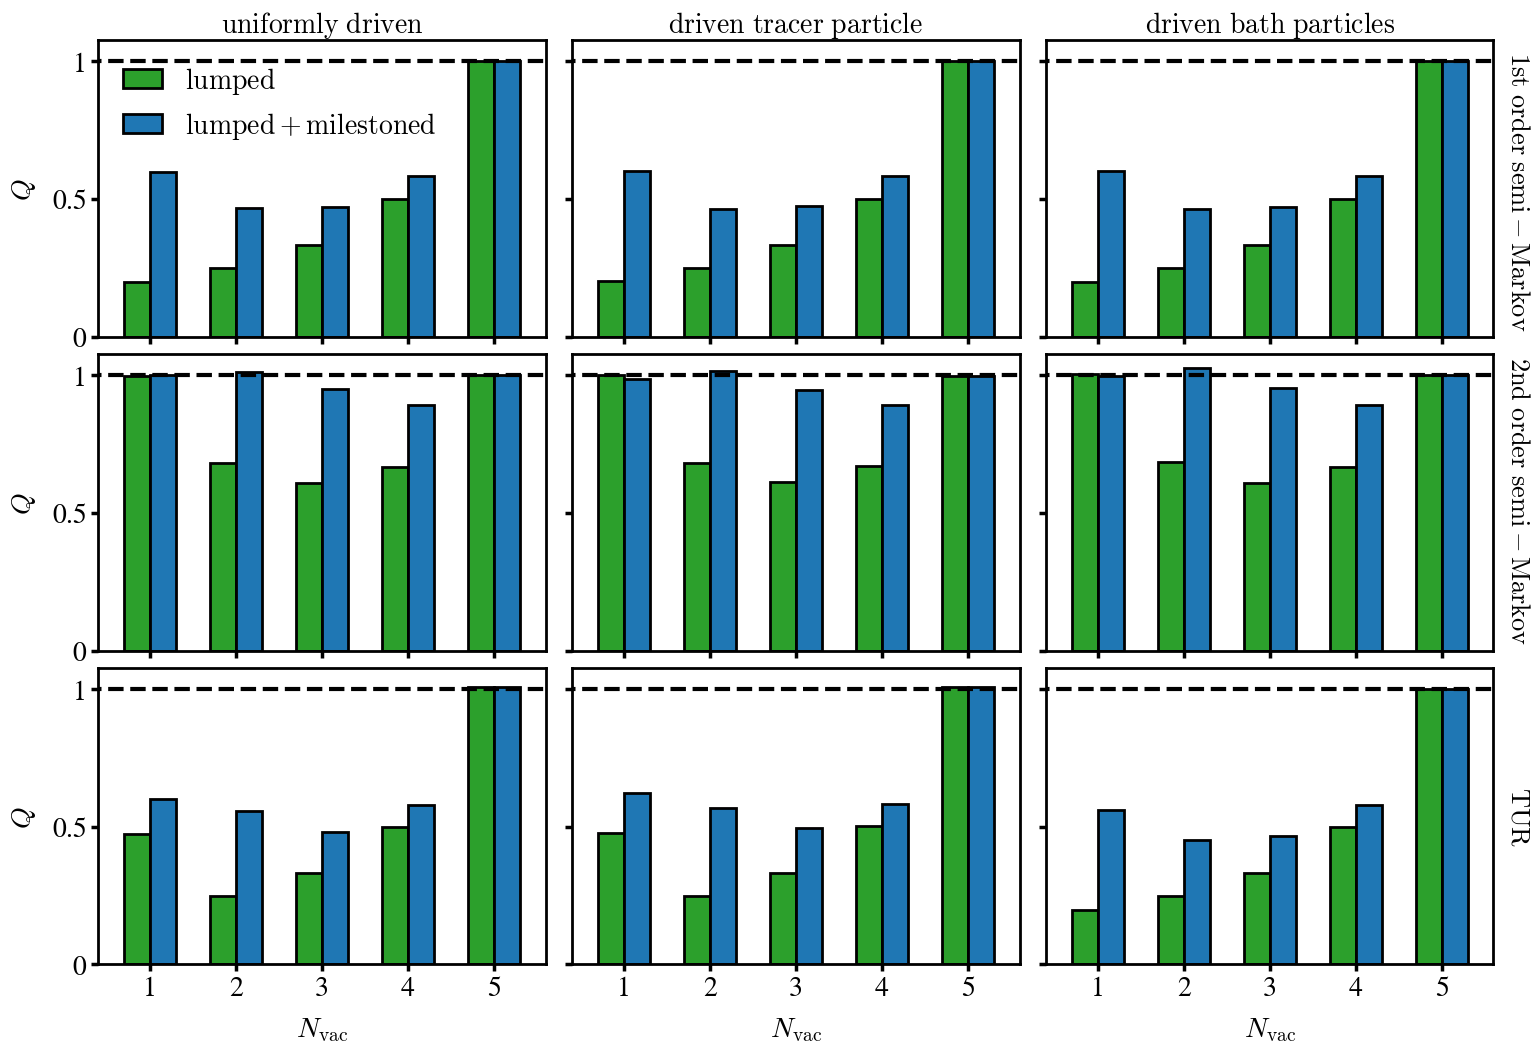

In [35]:
#Figure settings
fig, ax = plt.subplots(3,3, figsize = (18,12), sharey = True, sharex = True)
ax.ravel();

#Set x-axis
x  = np.arange(1, Nslots, 1)
x2 = np.arange(0, Nslots+1, 1)

#Plot horizontal line indicating Q=1
ax[0,0].plot(x2, np.ones(len(x2)), color = 'black' , linestyle = '--', linewidth = 3, zorder = 3)
ax[0,1].plot(x2, np.ones(len(x2)), color = 'black' , linestyle = '--', linewidth = 3, zorder = 3)
ax[0,2].plot(x2, np.ones(len(x2)), color = 'black' , linestyle = '--', linewidth = 3, zorder = 3)
ax[1,0].plot(x2, np.ones(len(x2)), color = 'black' , linestyle = '--', linewidth = 3, zorder = 3)
ax[1,1].plot(x2, np.ones(len(x2)), color = 'black' , linestyle = '--', linewidth = 3,  zorder = 3)
ax[1,2].plot(x2, np.ones(len(x2)), color = 'black' , linestyle = '--', linewidth = 3,  zorder = 3)
ax[2,0].plot(x2, np.ones(len(x2)), color = 'black' , linestyle = '--', linewidth = 3,  zorder = 3)
ax[2,1].plot(x2, np.ones(len(x2)), color = 'black' , linestyle = '--', linewidth = 3,  zorder = 3)
ax[2,2].plot(x2, np.ones(len(x2)), color = 'black' , linestyle = '--', linewidth = 3,  zorder = 3)

#Plot bar-charts for quality factor
offset = 0.15
ax[0,0].bar(x-offset, Q1_lumped[:,0], width = 2*offset,  color = 'C2', edgecolor = 'black', linewidth = 2, label = r'$\rm lumped$')
ax[0,0].bar(x+offset, Q1_mil[:,0],    width = 2*offset,  color = 'C0',  edgecolor = 'black', linewidth = 2, label = r'$ {\rm lumped} + {\rm milestoned} $')
ax[0,1].bar(x-offset, Q1_lumped[:,1], width = 2*offset,  color = 'C2',  edgecolor = 'black',  linewidth = 2)
ax[0,1].bar(x+offset, Q1_mil[:,1],    width = 2*offset,  color = 'C0',  edgecolor = 'black',  linewidth = 2)
ax[0,2].bar(x-offset, Q1_lumped[:,2], width = 2*offset,  color = 'C2',  edgecolor = 'black',  linewidth = 2)
ax[0,2].bar(x+offset, Q1_mil[:,2],    width = 2*offset,  color = 'C0',  edgecolor = 'black',  linewidth = 2)

ax[1,0].bar(x-offset, Q2_lumped[:,0], width = 2*offset, color = 'C2', edgecolor = 'black', linewidth = 2)
ax[1,0].bar(x+offset, Q2_mil[:,0],    width = 2*offset, color = 'C0', edgecolor = 'black', linewidth = 2)
ax[1,1].bar(x-offset, Q2_lumped[:,1], width = 2*offset, color = 'C2', edgecolor = 'black', linewidth = 2)
ax[1,1].bar(x+offset, Q2_mil[:,1], width = 2*offset, color = 'C0', edgecolor = 'black', linewidth = 2)
ax[1,2].bar(x-offset, Q2_lumped[:,2], width = 2*offset, color = 'C2', edgecolor = 'black', linewidth = 2)
ax[1,2].bar(x+offset, Q2_mil[:,2], width = 2*offset, color = 'C0', edgecolor = 'black', linewidth = 2)

for i in range(1, Nslots):
    ax[2,0].bar(i-offset, np.max(Q1_lumpedTUR[i-1,:,0]), width = 2*offset, color = 'C2', edgecolor = 'black', linewidth = 2)
    ax[2,0].bar(i+offset, np.max(Q1_milTUR[i-1,:,0]),    width = 2*offset, color = 'C0', edgecolor = 'black', linewidth = 2)
    ax[2,1].bar(i-offset, np.max(Q1_lumpedTUR[i-1,:,1]), width = 2*offset, color = 'C2', edgecolor = 'black', linewidth = 2)
    ax[2,1].bar(i+offset, np.max(Q1_milTUR[i-1,:,1]),    width = 2*offset, color = 'C0', edgecolor = 'black', linewidth = 2)
    ax[2,2].bar(i-offset, Q1_lumpedTUR[i-1,0,2], width = 2*offset, color = 'C2', edgecolor = 'black', linewidth = 2)
    ax[2,2].bar(i+offset, Q1_milTUR[i-1,0,2],    width = 2*offset, color = 'C0', edgecolor = 'black', linewidth = 2)

#Add titles
ax[0,0].set_title(r'$\rm uniformly \ driven$',          fontsize = 20);
ax[0,1].set_title(r'$\rm driven \ tracer \ particle$',  fontsize = 20);
ax[0,2].set_title(r'$\rm driven \ bath \ particles$',   fontsize = 20);

#Add text + figure labels
ax[0,2].text(1.08, 0.02, r'$\rm 1st \ order \ semi-Markov$', rotation = 90+180,
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax[0,2].transAxes, fontsize=19)
ax[1,2].text(1.08, 0.02, r'$\rm 2nd \ order \ semi-Markov$', rotation = 90+180,
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax[1,2].transAxes, fontsize=19)
ax[2,2].text(1.08, 0.4, r'$\rm TUR $', rotation = 90+180,
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax[2,2].transAxes, fontsize=19)

#Set tick sizes
for k in range(3):
    for j in range(3):
        ax[k,j].tick_params('both', length=5, width=2.5, which='major');
        ax[k,j].xaxis.set_tick_params(labelsize=20), ax[k,j].yaxis.set_tick_params(labelsize=20);

#Set axis limits
ax[-1,0].set_xlim([0.4,5.6])

#Set axis ticks
ax[-1,0].set_xticks([1,2,3,4,5],['1','2','3','4','5'],color='black')
ax[-1,0].set_yticks([0,0.5,1],['0','0.5','1'],color='black')

#Set x-label
ax[2,0].set_xlabel(r'$N_{\rm vac}$', size = 20, labelpad = 10);
ax[2,1].set_xlabel(r'$N_{\rm vac}$', size = 20, labelpad = 10);
ax[2,2].set_xlabel(r'$N_{\rm vac}$', size = 20, labelpad = 10);

#Set y-label
ax[0,0].set_ylabel(r'$Q$', size = 20, labelpad = 10);
ax[1,0].set_ylabel(r'$Q$', size = 20, labelpad = 10);
ax[2,0].set_ylabel(r'$Q$', size = 20, labelpad = 10);
    
#Adjust width subplots
plt.subplots_adjust(hspace=0.06, wspace=0.06)

#Legend
ax[0,0].legend(loc = 'best', handlelength = 1.4, frameon = False, fontsize = 20);

#Save figure
#plt.savefig('./Plots/quality_factor_single_file_revision2.pdf', bbox_inches = 'tight', dpi = 200)

### Calculate entropy production as a function of trajectory length (for SM)

In [44]:
#Set timesteps
timesteps = np.array([10000,10**5,10**6,10**7,10**8])

#Number of repetitions
num_rep = 5 #For Fig S3 I used num_rep = 20

#Initialize arrays
Q1_lumped        = np.zeros((len(timesteps),num_rep))
Q2_lumped        = np.zeros((len(timesteps),num_rep))
Q1_mil           = np.zeros((len(timesteps),num_rep))
Q2_mil           = np.zeros((len(timesteps),num_rep))

In [45]:
%%time
for ind, i in enumerate(timesteps):
    for j in range(num_rep):

        #Construct trajectories
        full_traj, lump_traj, mil_traj = single_file(i,9,1,3,0.46,0,True)
        

        #Calculate entropy production
        exact_entropy  = markov_entropy_calculator(full_traj,1)
        lump1_entropy  = markov_entropy_calculator(lump_traj,1)
        mil1_entropy   = markov_entropy_calculator(mil_traj,1)
        try:    lump2_entropy = semi_markov_entropy_module(lump_traj,2)
        except: lump2_entropy = 0
        try:    mil2_entropy = semi_markov_entropy_module(mil_traj,2)
        except: mil2_entropy = 0
        #Calculate quality factors
        Q1_lumped[ind,j] = lump1_entropy/exact_entropy
        Q1_mil[ind,j]    = mil1_entropy/exact_entropy
        Q2_lumped[ind,j] = lump2_entropy/exact_entropy
        Q2_mil[ind,j]    = mil2_entropy/exact_entropy
        #print(ind)

CPU times: user 3min 3s, sys: 6.56 s, total: 3min 9s
Wall time: 3min 9s


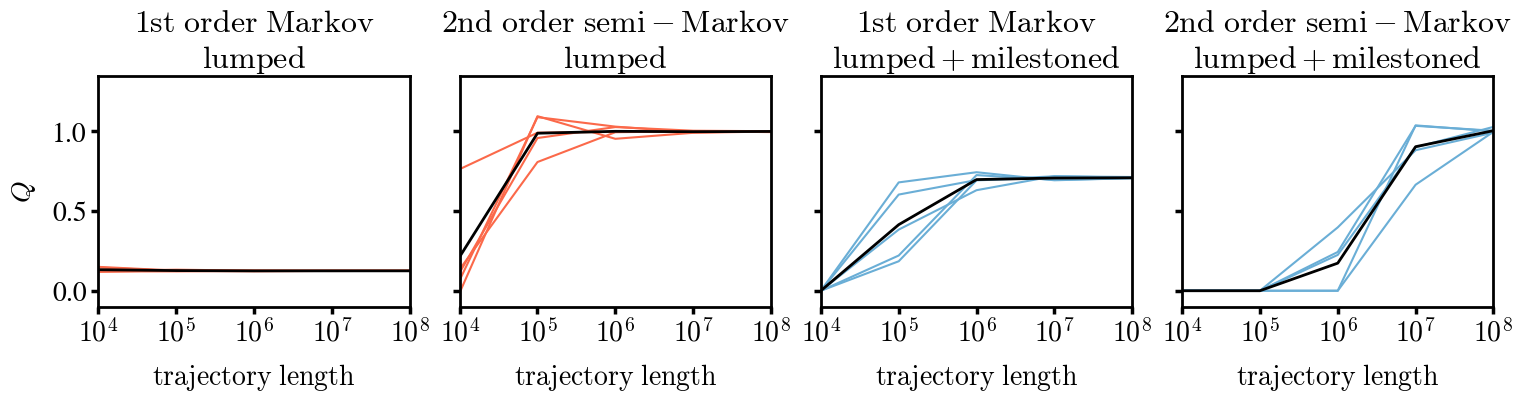

In [46]:
#Figure settings
fig, ax = plt.subplots(1,4, figsize = (18,3), sharey = True)
ax.ravel()

#Plot quality factors vs.  trajectory length
ax[0].plot(Q1_lumped, color = cm.Reds(0.5))
ax[0].plot(np.nanmean(Q1_lumped, axis=1), color = 'black', linewidth = 2)

ax[1].plot(Q2_lumped, color = cm.Reds(0.5))
ax[1].plot(np.nanmean(Q2_lumped, axis=1), color = 'black', linewidth = 2)

ax[2].plot(Q1_mil, color = cm.Blues(0.5))
ax[2].plot(np.nanmean(Q1_mil, axis=1), color = 'black', linewidth = 2)

ax[3].plot(Q2_mil, color = cm.Blues(0.5))
ax[3].plot(np.nanmean(Q2_mil, axis=1), color = 'black', linewidth = 2)

for i in range(4): 
    
    #Set axis limits
    ax[i].set_xlim([0,4])
    ax[i].set_ylim([-0.1,1.35])
    
    #Set axis ticks
    ax[i].set_xticks([0,1,2,3,4],[r'$10^{4}$',r'$10^{5}$',r'$10^{6}$',r'$10^{7}$',r'$10^{8}$'],color='black')
    
    #Set axis tick size
    ax[i].tick_params('both', length=5, width=2.5, which='major');
    ax[i].xaxis.set_tick_params(labelsize=20), ax[i].yaxis.set_tick_params(labelsize=20);
        
    #Set x-axis label
    ax[i].set_xlabel(r'$\rm trajectory \ length$', size = 20, labelpad = 10);

#Set y-axis label
ax[0].set_ylabel(r'$Q$', size = 20, labelpad = 10);

#Set title
ax[0].text(0.5, 1, r'$\rm 1st \ order \ Markov$' +'\n'+ r'$\rm lumped$', color = 'black',
                        verticalalignment='bottom', horizontalalignment='center',
                        transform=ax[0].transAxes, fontsize=23)
ax[1].text(0.5, 1, r'$\rm 2nd \ order \ semi-Markov$' +'\n'+ r'$\rm lumped$', color = 'black',
                        verticalalignment='bottom', horizontalalignment='center',
                        transform=ax[1].transAxes, fontsize=23)
ax[2].text(0.5, 1, r'$\rm 1st \ order \ Markov$' +'\n'+ r'$\rm lumped + milestoned$', color = 'black',
                        verticalalignment='bottom', horizontalalignment='center',
                        transform=ax[2].transAxes, fontsize=23)
ax[3].text(0.5, 1, r'$\rm 2nd \ order \ semi-Markov$' +'\n'+ r'$\rm lumped+milestoned$', color = 'black',
                        verticalalignment='bottom', horizontalalignment='center',
                        transform=ax[3].transAxes, fontsize=23)
    
#Adjust width subplots
plt.subplots_adjust(wspace=0.16)

#Save figure
#plt.savefig('./Plots/quality_factor_trajectory_length_analysis.pdf', bbox_inches = 'tight', dpi = 200)